In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import tf_utils
import time

#%matplotlib inline #如果你使用的是jupyter notebook取消注释
np.random.seed(1)

d:\python 3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\python 3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\python 3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\python 3.6\lib\site-packages\tensorflow\python\framework\dtypes.py:522: FutureWarning: Passing (type, 1) or '1type' as a synonym of type

In [2]:
y_hat = tf.constant(36, name="y_hat") #定义y_hat为固定值36
y = tf.constant(39, name="y") #定义y为固定值39

loss = tf.Variable((y-y_hat)**2, name="loss") #为损失函数创建一个变量

init = tf.global_variables_initializer()    #运行之后的初始化(session.run(init))
                                            #损失变量将被初始化并准备计算
with tf.Session() as session:           #创建一个session并打印输出
    session.run(init)                   #初始化变量
    print(session.run(loss))            #打印损失值

9


对于Tensorflow的代码实现而言，实现代码的结构如下：

1. 创建Tensorflow变量（此时，尚未直接计算）

2. 实现Tensorflow变量之间的操作定义

3. 初始化Tensorflow变量

4. 创建Session

5. 运行Session，此时，之前编写操作都会在这一步运行。


In [3]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a, b)

print(c)

Tensor("Mul:0", shape=(), dtype=int32)


正如预料中一样，我们并没有看到结果20，不过我们得到了一个Tensor类型的变量，没有维度，数字类型为int32。我们之前所做的一切都只是把这些东西放到了一个“计算图(computation graph)”中，而我们还没有开始运行这个计算图，为了实际计算这两个数字，我们需要创建一个会话并运行它：


In [4]:
sess = tf.Session()

print(sess.run(c))

20


总结一下，记得初始化变量，然后创建一个session来运行它。

接下来，我们需要了解一下占位符（placeholders）。占位符是一个对象，它的值只能在稍后指定，要指定占位符的值，可以使用一个feed字典（feed_dict变量）来传入，接下来，我们为x创建一个占位符，这将允许我们在稍后运行会话时传入一个数字。

In [5]:
x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x:3}))
sess.close()

6


当我们第一次定义x时，我们不必为它指定一个值。 占位符只是一个变量，我们会在运行会话时将数据分配给它。

## 1.1 - 线性函数
让我们通过计算以下等式来开始编程：$Y = WX + b$ ,$W$和$X$是随机矩阵，$b$是随机向量。
<br>
我们计算$WX+b$，其中$W$，$X$和$b$是从随机正态分布中抽取的。 $W$的维度是（4,3），$X$是（3,1），$b$是（4,1）。 我们开始定义一个shape=（3,1）的常量X：
```python
X = tf.constant(np.random.randn(3,1), name = "X")

```



In [6]:
def linear_function():
    """
    实现一个线性功能：
        初始化W，类型为tensor的随机变量，维度为(4,3)
        初始化X，类型为tensor的随机变量，维度为(3,1)
        初始化b，类型为tensor的随机变量，维度为(4,1)
    返回：
        result - 运行了session后的结果，运行的是Y = WX + b 
    
    """
    
    np.random.seed(1) #指定随机种子
    
    W = np.random.randn(4, 3)
    X = np.random.randn(3, 1)
    b = np.random.randn(4, 1)
    
    Y = tf.add(tf.matmul(W, X), b) #tf.matmul是矩阵乘法
    #Y = tf.matmul(W,X) + b #也可以以写成这样子
    
    #创建一个session并运行它
    sess = tf.Session()
    result = sess.run(Y)
    
    #session使用完毕，关闭它
    sess.close()
    
    return result

In [7]:
print("result = " +  str(linear_function()))

result = [[-1.98748544]
 [-2.76826248]
 [-0.78635415]
 [-2.77463846]]


## 1.2 - 计算sigmoid
我们已经实现了线性函数，TensorFlow提供了多种常用的神经网络的函数比如 `tf.sigmoid`和 `tf.softmax`。
我们将使用占位符变量x，当运行这个session的时候，我们西药使用使用feed字典来输入z，我们将创建占位符变量x，使用`tf.sigmoid`来定义操作符，最后运行session，我们会用到下面的代码:
- `tf.placeholder(tf.float32, name = "...")`
- `tf.sigmoid(...)`
- `sess.run(..., feed_dict = {x: z})`

需要注意的是我们可以使用两种方法来创建并使用session<br>
**方法一:**
```python
sess = tf.Session()
# Run the variables initialization (if needed), run the operations
result = sess.run(..., feed_dict = {...})
sess.close() # Close the session
```
**方法二:**
```python
with tf.Session() as sess: 
    # run the variables initialization (if needed), run the operations
    result = sess.run(..., feed_dict = {...})
    # This takes care of closing the session for you :)
```

In [8]:
def sigmoid(z):
    """
    实现使用sigmoid函数计算z
    
    参数：
        z - 输入的值，标量或矢量
    
    返回：
        result - 用sigmoid计算z的值
    
    """
    
    x = tf.placeholder(tf.float32, name="x")
    
    #计算sigmoid(z)
    sigmoid = tf.sigmoid(x)
    
    with tf.Session() as sess:
        result = sess.run(sigmoid, feed_dict = {x:z})
    return result

In [9]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


## 1.3 - 计算成本
还可以使用内置函数计算神经网络的成本。因此，不需要编写代码来计算成本函数的$a^{[2](i)}$和 $y^{(i)}$ for i=1…m:

$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{2}$$

实现成本函数，需要用到的是：
- `tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)`

你的代码应该输入$z$，计算sigmoid（得到 $a$），然后计算交叉熵成本$J$，所有的步骤都可以通过一次调用tf.nn.sigmoid_cross_entropy_with_logits来完成。

In [10]:
# GRADED FUNCTION: cost

def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: What we've been calling "z" and "y" in this class are respectively called "logits" and "labels" 
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    # Create the placeholders for "logits" (z) and "labels" (y) (approx. 2 lines)
    z = tf.placeholder(tf.float32, name = "z")
    y = tf.placeholder(tf.float32, name = "y")
    
    # Use the loss function (approx. 1 line)
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits= z, labels = y)
    
    
    with tf.Session() as sess:
        cost = sess.run(cost, feed_dict={z:logits, y: labels})
    
    return cost

In [11]:
logits = sigmoid(np.array([0.2, 0.4, 0.7, 0.9]))
cost = cost(logits, np.array([0, 0, 1, 1]))
print ("cost = " + str(cost))

cost = [1.0053872  1.0366408  0.41385433 0.39956617]


## 1.4 -  使用独热编码（0、1编码）
很多时候在深度学习中$y$向量的维度是从$0$到$C-1$的，$C$是指分类的类别数量，如果$C=4$，那么对$y$而言你可能需要有以下的转换方式:

<img src="images/onehot.png" style="width:600px;height:150px;">

这叫做独热编码（“one hot” encoding），因为在转换后的表示中，每列的一个元素是“hot”（意思是设置为1）。 要在numpy中进行这种转换，您可能需要编写几行代码。 在tensorflow中，只需要使用一行代码
- tf.one_hot(labels, depth, axis) 

In [12]:
def one_hot_matrix(lables,C):
    """
    创建一个矩阵，其中第i行对应第i个类号，第j列对应第j个训练样本
    所以如果第j个样本对应着第i个标签，那么entry (i,j)将会是1
    
    参数：
        lables - 标签向量
        C - 分类数
        
    返回：
        one_hot - 独热矩阵
    
    """
    
    #创建一个tf.constant，赋值为C，名字叫C
    C = tf.constant(C, name = "C")
    
    #使用tf.one_hot，注意一下axis
    one_hot_matrix = tf.one_hot(indices = labels, depth =C, axis = 0)
    
    #创建一个session
    sess = tf.Session()
    
    #运行session
    one_hot = sess.run(one_hot_matrix)
    
    #关闭session
    sess.close()
    
    return one_hot

In [13]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels,C=4)
print(str(one_hot))

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


## 1.5 初始化为0和1
现在我们将学习如何用0或者1初始化一个向量，我们要用到tf.ones()和tf.zeros()，给定这些函数一个维度值那么它们将会返回全是1或0的满足条件的向量/矩阵，我们来看看怎样实现它们：

In [14]:
def ones(shape):
    """
    创建一个维度为shape的变量，其值全为1
    
    参数：
        shape - 你要创建的数组的维度
    
    返回：
        ones - 只包含1的数组    
    """
    
    ones = tf.ones(shape)
    
    sess = tf.Session()
    
    ones = sess.run(ones)
    
    sess.close()
    
    return ones

In [15]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


## 使用Tensorflow构建你的第一个神经网络
我们将会使用TensorFlow构建一个神经网络，需要记住的是实现模型需要做以下两个步骤：

- 创建计算图
- 运行计算图

我们开始一步步地走一下：

## 2.0 -要解决的问题

一天下午，我们和一些朋友决定教我们的电脑破译手语。我们花了几个小时在白色的墙壁前拍照，于是就有了了以下数据集。现在，你的任务是建立一个算法，使有语音障碍的人与不懂手语的人交流。

- 训练集：有从0到5的数字的1080张图片(64x64像素)，每个数字拥有180张图片。
- 测试集：有从0到5的数字的120张图片(64x64像素)，每个数字拥有5张图片。

下面是每个数字的样本，以及我们如何表示标签的解释。这些都是原始图片，我们实际上用的是64 * 64像素的图片。

<img src="images/hands.png" style="width:800px;height:350px;"><caption><center> <u><font color='purple'> **Figure 1**</u><font color='purple'>: 手势符号数据集 <br> <font color='black'> </center>

In [16]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = tf_utils.load_dataset()

我们可以看一下数据集里面有什么，当然你也可以自己更改一下index的值。

Y =2


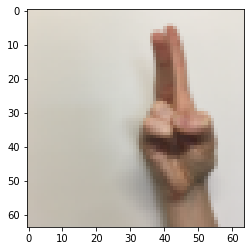

In [17]:
index = 80
plt.imshow(X_train_orig[index])
print("Y =" + str(np.squeeze(Y_train_orig[:, index])))

和往常一样，我们要对数据集进行扁平化，然后再除以255以归一化数据，除此之外，我们要需要把每个标签转化为独热向量，像上面的图一样。

In [18]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T #每一列就是一个样本
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

#归一化数据
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

Y_train = tf_utils.convert_to_one_hot(Y_train_orig, 6)
Y_test = tf_utils.convert_to_one_hot(Y_test_orig, 6)
print("训练集样本数 = " + str(X_train.shape[1]))
print("测试集样本数 = " + str(X_test.shape[1]))
print("X_train.shape: " + str(X_train.shape))
print("Y_train.shape: " + str(Y_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("Y_test.shape: " + str(Y_test.shape))


训练集样本数 = 1080
测试集样本数 = 120
X_train.shape: (12288, 1080)
Y_train.shape: (6, 1080)
X_test.shape: (12288, 120)
Y_test.shape: (6, 120)


我们的目标是构建能够高准确度识别符号的算法。 要做到这一点，你要建立一个TensorFlow模型，这个模型几乎和你之前在猫识别中使用的numpy一样（但现在使用softmax输出）。要将您的numpy实现与tensorflow实现进行比较的话这是一个很好的机会。<br>
目前的模型是：LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX，SIGMOID输出层已经转换为SOFTMAX。当有两个以上的类时，一个SOFTMAX层将SIGMOID一般化。

## 2.1 - 创建placeholder
我们的第一项任务是为X和Y创建占位符，这将允许我们稍后在运行会话时传递您的训练数据。

In [19]:
def create_placeholders(n_x,n_y):
    """
    为TensorFlow会话创建占位符
    参数：
        n_x - 一个实数，图片向量的大小（64*64*3 = 12288）
        n_y - 一个实数，分类数（从0到5，所以n_y = 6）
    
    返回：
        X - 一个数据输入的占位符，维度为[n_x, None]，dtype = "float"
        Y - 一个对应输入的标签的占位符，维度为[n_Y,None]，dtype = "float"
    
    提示：
        使用None，因为它让我们可以灵活处理占位符提供的样本数量。事实上，测试/训练期间的样本数量是不同的。
    
    """
    X = tf.placeholder(tf.float32, [n_x, None], name = "X")
    Y = tf.placeholder(tf.float32, [n_y, None], name = "Y")
    
    return X, Y

In [20]:
X, Y = create_placeholders(12288, 6)
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("X:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y:0", shape=(6, ?), dtype=float32)


## 2.2 - 初始化参数
初始化tensorflow中的参数，我们将使用Xavier初始化权重和用零来初始化偏差，比如：

```python
W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
```
```tf.Variable()``` 每次都在创建新对象，对于```get_variable()```来说，对于已经创建的变量对象，就把那个对象返回，如果没有创建变量对象的话，就创建一个新的。

In [21]:
def initialize_parameters():
    """
    初始化神经网络的参数，参数的维度如下：
        W1 : [25, 12288]
        b1 : [25, 1]
        W2 : [12, 25]
        b2 : [12, 1]
        W3 : [6, 12]
        b3 : [6, 1]
    
    返回：
        parameters - 包含了W和b的字典
    
    
    """
    
    tf.set_random_seed(1) #指定随机种子
    
    W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W1", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b1", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W1", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b1", [6,1], initializer = tf.zeros_initializer())
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    return parameters

In [23]:

with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

ValueError: Variable W1 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "d:\python 3.6\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access
  File "d:\python 3.6\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "d:\python 3.6\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
